## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.850717 -1.203087 -0.763211 -0.654273 -0.150881 -0.961415
1 -0.387739  1.648004  0.333088 -0.908082 -1.583689 -0.593249
2  1.270407  1.708111 -0.816449 -0.805757 -1.616294 -1.024632
3  0.677293 -0.159763  0.731679 -1.488878 -1.775925 -1.026573
4  0.763131 -1.018644  0.804982 -0.715859 -0.368223 -0.803748


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9829435	total: 68.6ms	remaining: 1m 8s
1:	learn: 0.9718557	total: 69.2ms	remaining: 34.5s
2:	learn: 0.9618739	total: 69.6ms	remaining: 23.1s
3:	learn: 0.9513835	total: 70ms	remaining: 17.4s
4:	learn: 0.9428444	total: 70.5ms	remaining: 14s
5:	learn: 0.9335243	total: 71ms	remaining: 11.8s
6:	learn: 0.9236870	total: 71.5ms	remaining: 10.1s
7:	learn: 0.9134422	total: 72.1ms	remaining: 8.94s
8:	learn: 0.9043652	total: 73.6ms	remaining: 8.11s
9:	learn: 0.8951602	total: 74.1ms	remaining: 7.34s
10:	learn: 0.8862228	total: 74.7ms	remaining: 6.71s
11:	learn: 0.8758070	total: 75.1ms	remaining: 6.18s
12:	learn: 0.8676571	total: 75.5ms	remaining: 5.74s
13:	learn: 0.8597914	total: 76ms	remaining: 5.35s
14:	learn: 0.8522145	total: 76.5ms	remaining: 5.03s
15:	learn: 0.8439218	total: 77ms	remaining: 4.73s
16:	learn: 0.8348570	total: 77.6ms	remaining: 4.49s
17:	learn: 0.8268829	total: 78.1ms	remaining: 4.26s
18:	learn: 0.8188741	total: 78.5ms	remaining: 4.05s
19

81:	learn: 0.4765944	total: 109ms	remaining: 1.22s
82:	learn: 0.4720015	total: 109ms	remaining: 1.21s
83:	learn: 0.4683121	total: 110ms	remaining: 1.2s
84:	learn: 0.4645513	total: 110ms	remaining: 1.19s
85:	learn: 0.4610722	total: 111ms	remaining: 1.18s
86:	learn: 0.4571524	total: 111ms	remaining: 1.17s
87:	learn: 0.4533155	total: 112ms	remaining: 1.16s
88:	learn: 0.4500238	total: 112ms	remaining: 1.15s
89:	learn: 0.4465111	total: 113ms	remaining: 1.14s
90:	learn: 0.4431035	total: 113ms	remaining: 1.13s
91:	learn: 0.4397364	total: 114ms	remaining: 1.12s
92:	learn: 0.4359213	total: 114ms	remaining: 1.11s
93:	learn: 0.4326561	total: 115ms	remaining: 1.1s
94:	learn: 0.4294579	total: 115ms	remaining: 1.09s
95:	learn: 0.4262408	total: 115ms	remaining: 1.09s
96:	learn: 0.4231427	total: 116ms	remaining: 1.08s
97:	learn: 0.4201496	total: 116ms	remaining: 1.07s
98:	learn: 0.4170545	total: 117ms	remaining: 1.06s
99:	learn: 0.4139316	total: 117ms	remaining: 1.06s
100:	learn: 0.4107771	total: 118m

246:	learn: 0.1614056	total: 188ms	remaining: 572ms
247:	learn: 0.1603707	total: 188ms	remaining: 571ms
248:	learn: 0.1593565	total: 189ms	remaining: 569ms
249:	learn: 0.1584475	total: 189ms	remaining: 568ms
250:	learn: 0.1574569	total: 190ms	remaining: 566ms
251:	learn: 0.1565791	total: 190ms	remaining: 565ms
252:	learn: 0.1555306	total: 191ms	remaining: 563ms
253:	learn: 0.1546419	total: 191ms	remaining: 562ms
254:	learn: 0.1539490	total: 192ms	remaining: 560ms
255:	learn: 0.1530656	total: 192ms	remaining: 559ms
256:	learn: 0.1520957	total: 193ms	remaining: 557ms
257:	learn: 0.1510958	total: 193ms	remaining: 556ms
258:	learn: 0.1502099	total: 194ms	remaining: 554ms
259:	learn: 0.1493715	total: 194ms	remaining: 553ms
260:	learn: 0.1483754	total: 195ms	remaining: 551ms
261:	learn: 0.1475042	total: 195ms	remaining: 550ms
262:	learn: 0.1467491	total: 196ms	remaining: 549ms
263:	learn: 0.1458719	total: 196ms	remaining: 548ms
264:	learn: 0.1449374	total: 197ms	remaining: 546ms
265:	learn: 

456:	learn: 0.0588618	total: 292ms	remaining: 347ms
457:	learn: 0.0585561	total: 293ms	remaining: 346ms
458:	learn: 0.0583020	total: 293ms	remaining: 346ms
459:	learn: 0.0581058	total: 294ms	remaining: 345ms
460:	learn: 0.0578584	total: 294ms	remaining: 344ms
461:	learn: 0.0576662	total: 294ms	remaining: 343ms
462:	learn: 0.0573903	total: 295ms	remaining: 342ms
463:	learn: 0.0572028	total: 295ms	remaining: 341ms
464:	learn: 0.0569351	total: 296ms	remaining: 340ms
465:	learn: 0.0566304	total: 296ms	remaining: 339ms
466:	learn: 0.0563940	total: 297ms	remaining: 339ms
467:	learn: 0.0562129	total: 297ms	remaining: 338ms
468:	learn: 0.0559578	total: 298ms	remaining: 337ms
469:	learn: 0.0557315	total: 298ms	remaining: 336ms
470:	learn: 0.0555102	total: 298ms	remaining: 335ms
471:	learn: 0.0552937	total: 299ms	remaining: 334ms
472:	learn: 0.0550819	total: 299ms	remaining: 333ms
473:	learn: 0.0548748	total: 300ms	remaining: 333ms
474:	learn: 0.0547328	total: 300ms	remaining: 332ms
475:	learn: 

623:	learn: 0.0295844	total: 371ms	remaining: 224ms
624:	learn: 0.0294923	total: 372ms	remaining: 223ms
625:	learn: 0.0293842	total: 372ms	remaining: 222ms
626:	learn: 0.0291832	total: 372ms	remaining: 221ms
627:	learn: 0.0290969	total: 373ms	remaining: 221ms
628:	learn: 0.0289281	total: 374ms	remaining: 220ms
629:	learn: 0.0287708	total: 374ms	remaining: 220ms
630:	learn: 0.0286866	total: 374ms	remaining: 219ms
631:	learn: 0.0286116	total: 375ms	remaining: 218ms
632:	learn: 0.0284388	total: 376ms	remaining: 218ms
633:	learn: 0.0283666	total: 376ms	remaining: 217ms
634:	learn: 0.0282154	total: 376ms	remaining: 216ms
635:	learn: 0.0281178	total: 377ms	remaining: 216ms
636:	learn: 0.0280376	total: 377ms	remaining: 215ms
637:	learn: 0.0279573	total: 378ms	remaining: 214ms
638:	learn: 0.0278368	total: 378ms	remaining: 214ms
639:	learn: 0.0276724	total: 379ms	remaining: 213ms
640:	learn: 0.0275793	total: 379ms	remaining: 212ms
641:	learn: 0.0274956	total: 380ms	remaining: 212ms
642:	learn: 

836:	learn: 0.0140837	total: 476ms	remaining: 92.6ms
837:	learn: 0.0140146	total: 476ms	remaining: 92.1ms
838:	learn: 0.0139436	total: 477ms	remaining: 91.5ms
839:	learn: 0.0138912	total: 477ms	remaining: 90.9ms
840:	learn: 0.0138397	total: 478ms	remaining: 90.3ms
841:	learn: 0.0137929	total: 478ms	remaining: 89.7ms
842:	learn: 0.0137477	total: 479ms	remaining: 89.1ms
843:	learn: 0.0136809	total: 479ms	remaining: 88.6ms
844:	learn: 0.0136127	total: 480ms	remaining: 88ms
845:	learn: 0.0135687	total: 480ms	remaining: 87.4ms
846:	learn: 0.0135184	total: 480ms	remaining: 86.8ms
847:	learn: 0.0134692	total: 481ms	remaining: 86.2ms
848:	learn: 0.0134578	total: 481ms	remaining: 85.6ms
849:	learn: 0.0134145	total: 482ms	remaining: 85ms
850:	learn: 0.0133478	total: 482ms	remaining: 84.4ms
851:	learn: 0.0133367	total: 483ms	remaining: 83.8ms
852:	learn: 0.0132800	total: 483ms	remaining: 83.3ms
853:	learn: 0.0132690	total: 484ms	remaining: 82.7ms
854:	learn: 0.0132581	total: 484ms	remaining: 82.1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

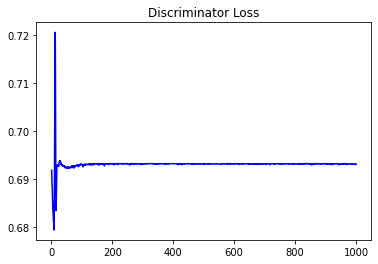

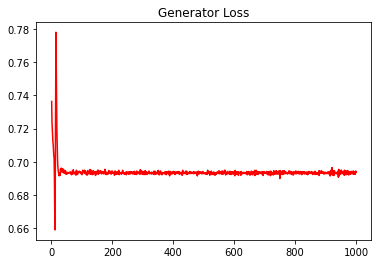

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.16502570167955738


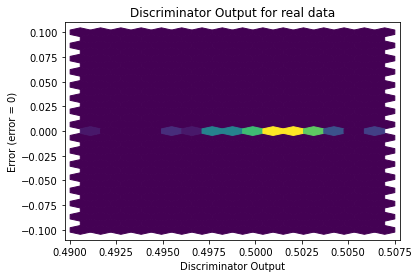

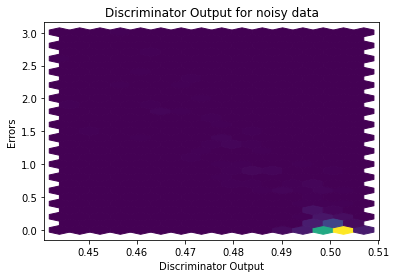

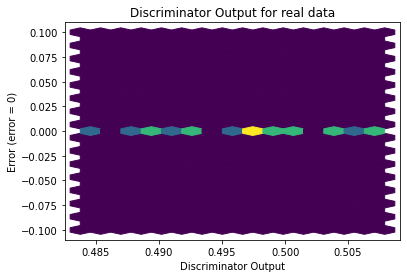

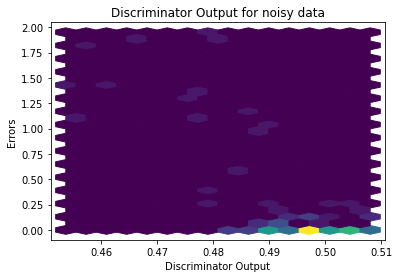

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


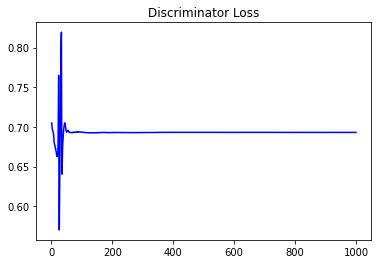

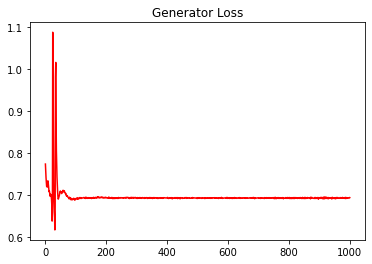

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14001368353684301


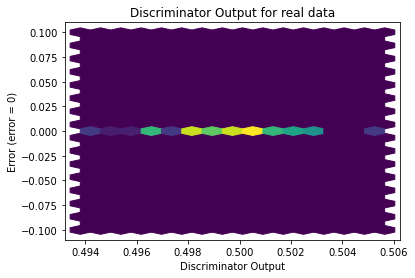

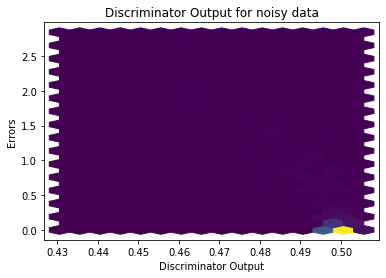

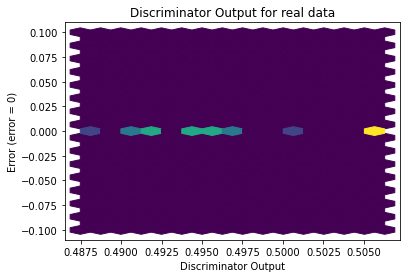

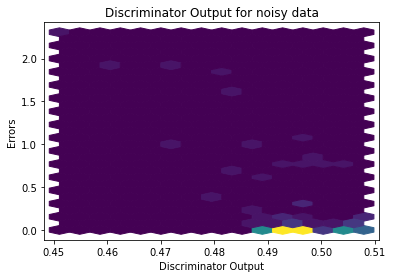

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7459]], requires_grad=True)
